# 1.) Pull in Data and Convert to Monthly

In [64]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [66]:
apple_data = yf.download('AAPL')
df = apple_data.resample("M").last()[["Adj Close"]]

[*********************100%%**********************]  1 of 1 completed


# 2.) Create columns. 
  - Current Stock Price, Difference in stock price, Whether it went up or down over the next month,  option premium

In [68]:
df.head()

,Adj Close
Date,
1980-12-31,0.117887
1981-01-31,0.097591
1981-02-28,0.091546
1981-03-31,0.084637
1981-04-30,0.098023


In [70]:
# Difference in Stock Price
df["Diff"] = df["Adj Close"].diff().shift(-1)

# Target 
df["Target"] = np.sign(df["Diff"])

# Premium
df["Premium"] = .08 * df["Adj Close"]

In [72]:
df.head()

,Adj Close,Diff,Target,Premium
Date,,,,
1980-12-31,0.117887,-0.020296,-1.0,0.009431
1981-01-31,0.097591,-0.006045,-1.0,0.007807
1981-02-28,0.091546,-0.006909,-1.0,0.007324
1981-03-31,0.084637,0.013386,1.0,0.006771
1981-04-30,0.098023,0.016409,1.0,0.007842


# 3.) Pull in X data, normalize and build a LogReg on column 2

In [74]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [76]:
X = pd.read_csv("Xdata.csv", index_col="Date", parse_dates=["Date"])

In [80]:
y = df.loc[:"2023-09-30","Target"].copy()

df = df.loc[:"2023-09-30",:].copy()

In [82]:
# Fit a logistic regression
logreg = LogisticRegression()

logreg.fit(X,y)

LogisticRegression()

# 4.) Add columns, prediction and profits.

In [84]:
y_pred = logreg.predict(X)

In [86]:
df["Predictions"] = y_pred

In [113]:
df["Profits"] = 0.

In [124]:
# True Positive Profits
df.loc[(df["Target"] == 1) & (df["Predictions"] == 1), "Profits"] = df["Premium"]

# False Positive Profits
df.loc[(df["Target"] == -1) & (df["Predictions"] == 1), "Profits"] = 100 * df["Diff"] + df["Premium"]

# 5.) Plot profits over time

In [126]:
df

,Adj Close,Diff,Target,Premium,Predictions,Profits
Date,,,,,,
1980-12-31,0.117887,-0.020296,-1.0,0.009431,-1.0,0.000000
1981-01-31,0.097591,-0.006045,-1.0,0.007807,-1.0,0.000000
1981-02-28,0.091546,-0.006909,-1.0,0.007324,-1.0,0.000000
1981-03-31,0.084637,0.013386,1.0,0.006771,1.0,0.006771
1981-04-30,0.098023,0.016409,1.0,0.007842,1.0,0.007842
...,...,...,...,...,...,...
2023-05-31,176.778076,16.675476,1.0,14.142246,1.0,14.142246
2023-06-30,193.453552,2.473404,1.0,15.476284,1.0,15.476284
2023-07-31,195.926956,-8.304138,-1.0,15.674156,-1.0,0.000000


Text(0, 0.5, 'Profits')

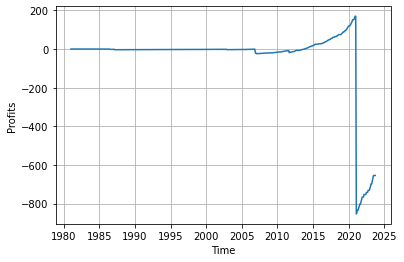

In [122]:
plt.plot(np.cumsum(df["Profits"]))
plt.grid()
plt.xlabel("Time")
plt.ylabel("Profits")

# 5.5) Short write up about how you see your skills valuable to PJ (who presented in the beginning) and/or Philip Liu

For PJ's social media platform, I can create a logistic probability function and use it to predict if a consumer will buy a ticket for a chat room. For example, if the logistic probability function returns a probability over a determined $p$, then I can predict that a consumer will buy a ticket. Then my econometrics skills can help determine which factors increase the probability of a consumer buying a ticket for a chat, and based on the findings, PJ's team can make adjustments to their business model or business strategy to increase demand and influence more consumers to buy tickets. I can even predict what the increase in demand would be based on their business strategy revisions and then forecast the price or value of their cryptocurrency based on the demand increases.

# 6.) Create a loop that stores total profits over time

# 7.) What is the optimal threshold and plot the total profits for this model.